# Recurrent neural Network and Long Short Term Memory

# LSTM

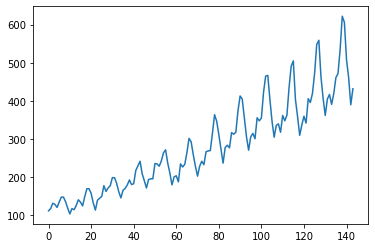

In [1]:

import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('E:/AI & ML NEHA/winter main/deep learning/lab/airline-passengers.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()

In [2]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [3]:


# fix random seed for reproducibility
numpy.random.seed(7)

In [4]:
# load the dataset
dataframe = pandas.read_csv('E:/AI & ML NEHA/winter main/deep learning/lab/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [5]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [6]:


# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [7]:


# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [8]:

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [9]:

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [10]:


# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 2s - loss: 0.0320
Epoch 2/100
94/94 - 0s - loss: 0.0143
Epoch 3/100
94/94 - 0s - loss: 0.0114
Epoch 4/100
94/94 - 0s - loss: 0.0107
Epoch 5/100
94/94 - 0s - loss: 0.0096
Epoch 6/100
94/94 - 0s - loss: 0.0087
Epoch 7/100
94/94 - 0s - loss: 0.0079
Epoch 8/100
94/94 - 0s - loss: 0.0068
Epoch 9/100
94/94 - 0s - loss: 0.0060
Epoch 10/100
94/94 - 0s - loss: 0.0053
Epoch 11/100
94/94 - 0s - loss: 0.0046
Epoch 12/100
94/94 - 0s - loss: 0.0040
Epoch 13/100
94/94 - 0s - loss: 0.0034
Epoch 14/100
94/94 - 0s - loss: 0.0030
Epoch 15/100
94/94 - 0s - loss: 0.0027
Epoch 16/100
94/94 - 0s - loss: 0.0025
Epoch 17/100
94/94 - 0s - loss: 0.0023
Epoch 18/100
94/94 - 0s - loss: 0.0022
Epoch 19/100
94/94 - 0s - loss: 0.0021
Epoch 20/100
94/94 - 0s - loss: 0.0023
Epoch 21/100
94/94 - 0s - loss: 0.0021
Epoch 22/100
94/94 - 0s - loss: 0.0020
Epoch 23/100
94/94 - 0s - loss: 0.0020
Epoch 24/100
94/94 - 0s - loss: 0.0020
Epoch 25/100
94/94 - 0s - loss: 0.0021
Epoch 26/100
94/94 - 0s - loss: 0.

In [11]:


# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.78 RMSE
Test Score: 47.94 RMSE


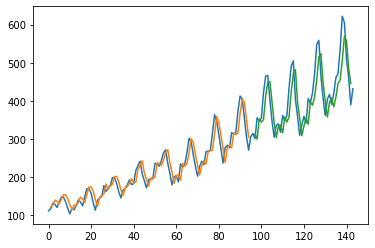

In [12]:


# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# RNN

In [13]:
#Importing the necessary libraries and packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas_datareader as pdr
from sklearn import metrics

In [14]:
#Obtaining the Dataset
df = pdr.get_data_yahoo("AAPL", "2010-11-01", "2020-11-01") #create a dataframe from internet datasource-Yahoo! Finance


In [15]:
df.head(9)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-11-01,10.914286,10.792857,10.793571,10.863571,423889200.0,9.357483
2010-11-02,11.078214,10.964286,10.964286,11.048571,433930000.0,9.516835
2010-11-03,11.174286,11.018929,11.120357,11.171429,508348400.0,9.622657
2010-11-04,11.435000,11.251071,11.266071,11.366786,642488000.0,9.790934
2010-11-05,11.413214,11.312500,11.356786,11.326071,361253200.0,9.755861
2010-11-08,11.420357,11.312857,11.328571,11.379286,281758400.0,9.801701
2010-11-09,11.475000,11.232143,11.466071,11.288571,383544000.0,9.723564
2010-11-10,11.384643,11.198214,11.308571,11.358214,384227200.0,9.783554
2010-11-11,11.371429,11.223214,11.250000,11.308929,361284000.0,9.741098


In [16]:
df["Diff"] = df.Close.diff()
df["SMA_2"] = df.Close.rolling(2).mean()# Calculating moving averages of closing prices
df["Force_Index"] = df["Close"] * df["Volume"]
df["y"] = df["Diff"].apply(lambda x: 1 if x > 0 else 0).shift(-1)
df = df.drop(
   ["Open", "High", "Low", "Close", "Volume", "Diff", "Adj Close"], # Open,High,Low,Close,Volume,Diff,Adj Close features whose tuples that have missing values are removed  from the dataframe
   axis=1,
).dropna()
# print(df)
X = df.drop(["y"], axis=1).values # Assigning the independent variable or X variable
y = df["y"].values #Assigning predictor variables


In [17]:
#Splitting into train (80% of the dataset)and test data (20% of the dataset)
X_train, X_test, y_train, y_test = train_test_split(
   X,
   y,
   test_size=0.2,
   shuffle=False,
)


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-11-02 to 2020-10-29
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SMA_2        2516 non-null   float64
 1   Force_Index  2516 non-null   float64
 2   y            2516 non-null   float64
dtypes: float64(3)
memory usage: 78.6 KB


In [19]:
df.describe()

,SMA_2,Force_Index,y
count,2516.000000,2.516000e+03,2516.00000
mean,34.327839,6.927604e+09,0.52663
std,21.842704,4.443599e+09,0.49939
min,10.751607,1.282891e+09,0.00000
25%,19.155267,4.111956e+09,0.00000
50%,27.793750,5.590313e+09,1.00000
75%,43.315938,8.246173e+09,1.00000
max,132.789993,4.353884e+10,1.00000


In [20]:
from keras import Sequential
from keras.layers import Dense, SimpleRNN

In [21]:
#Creating the model havng a simple RNN layer and densenet layer with sigmoid activation and adam optimizer
model = Sequential()
model.add(SimpleRNN(2, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])


In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 2)                 8         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(X_train[:, :, np.newaxis], y_train, epochs=100)#Training the model for 100 epochs each having 63 iterations

Epoch 1/100
63/63 [==============================] - 1s 1ms/step - loss: 1.2571 - acc: 0.5153
Epoch 2/100
63/63 [==============================] - 0s 1ms/step - loss: 1.1671 - acc: 0.5237
Epoch 3/100
63/63 [==============================] - 0s 1ms/step - loss: 1.0825 - acc: 0.5327
Epoch 4/100
63/63 [==============================] - 0s 1ms/step - loss: 1.0531 - acc: 0.5165
Epoch 5/100
63/63 [==============================] - 0s 1ms/step - loss: 0.9806 - acc: 0.5249
Epoch 6/100
63/63 [==============================] - 0s 1ms/step - loss: 0.9570 - acc: 0.5079
Epoch 7/100
63/63 [==============================] - 0s 1ms/step - loss: 0.9106 - acc: 0.5069
Epoch 8/100
63/63 [==============================] - 0s 1ms/step - loss: 0.8546 - acc: 0.5186
Epoch 9/100
63/63 [==============================] - 0s 1ms/step - loss: 0.8129 - acc: 0.5251
Epoch 10/100
63/63 [==============================] - 0s 1ms/step - loss: 0.7970 - acc: 0.5131
Epoch 11/100
63/63 [==============================] - 0s 1m

63/63 [==============================] - 0s 1ms/step - loss: 0.6917 - acc: 0.5277
Epoch 88/100
63/63 [==============================] - 0s 1ms/step - loss: 0.6918 - acc: 0.5274
Epoch 89/100
63/63 [==============================] - 0s 1ms/step - loss: 0.6909 - acc: 0.5383
Epoch 90/100
63/63 [==============================] - 0s 1ms/step - loss: 0.6921 - acc: 0.5238
Epoch 91/100
63/63 [==============================] - 0s 1ms/step - loss: 0.6915 - acc: 0.5315
Epoch 92/100
63/63 [==============================] - 0s 1ms/step - loss: 0.6927 - acc: 0.5159
Epoch 93/100
63/63 [==============================] - 0s 1ms/step - loss: 0.6910 - acc: 0.5377
Epoch 94/100
63/63 [==============================] - 0s 1ms/step - loss: 0.6926 - acc: 0.5174
Epoch 95/100
63/63 [==============================] - 0s 1ms/step - loss: 0.6916 - acc: 0.5299
Epoch 96/100
63/63 [==============================] - 0s 1ms/step - loss: 0.6927 - acc: 0.5155
Epoch 97/100
63/63 [==============================] - 0s 1ms/st

In [24]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test[:, :, np.newaxis])#testing the model
print("Accuracy of RNN Model:",accuracy_score(y_test, y_pred > 0.5))

Accuracy of RNN Model: 0.5496031746031746


In [25]:
df2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : y_pred.flatten()})#Creating a second dataframe for the actual and predicted values of the dependent variable

In [26]:
df2.head(25)

,Actual,Predicted
0,1.0,0.52175
1,1.0,0.52175
2,0.0,0.52175
3,0.0,0.52175
4,1.0,0.52175
5,1.0,0.52175
6,0.0,0.52175
7,0.0,0.52175
8,0.0,0.52175
9,0.0,0.52175


In [27]:
#MAPE and RMSE calculation
import math
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred)*100)
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 49.78422822933348
Mean Squared Error: 0.24831533585339563
Root Mean Squared Error: 0.49831248815717594


In [28]:
graph = df2.head(20)

<AxesSubplot:>

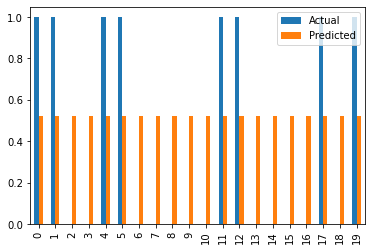

In [29]:
graph.plot(kind='bar')#Plotting a bar graph between the actual and predicted values 

https://github.com/nehrjv/Deep-Learning-lab-Assignment/tree/main/Assessmnt5-RNN%20and%20LSTM